In [ ]:
import pandas as pd
import numpy as np
import json
import requests
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
games = pd.read_csv(
        'nba_games_all.csv')
#colToDrop = ['oreb', 'dreb', 'reb', 'ast',
                 #'stl', 'blk', 'tov', 'pf', 'pts', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct']
g = games

g.sort_values('game_date', ascending=False)

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season
113778,21800266,2018-11-23,LAC vs. MEM,1610612763,f,NaN,NaN,NaN,NaN,0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1610612746,2018,Regular Season,2018-19
113779,21800266,2018-11-23,MEM @ LAC,1610612746,t,NaN,NaN,NaN,NaN,0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1610612763,2018,Regular Season,2018-19
13398,41700404,2018-06-08,CLE vs. GSW,1610612744,f,W,4.0,0.0,1.000,240,39.0,86.0,0.453,14.0,38.0,0.368,16.0,16.0,1.0,10.0,34.0,44,25.0,7.0,13.0,8.0,24.0,108,1610612739,2017,Playoffs,2017-18
12643,41700404,2018-06-08,GSW @ CLE,1610612739,t,L,0.0,4.0,0.000,240,30.0,87.0,0.345,8.0,27.0,0.296,17.0,25.0,1.0,17.0,27.0,44,21.0,5.0,5.0,11.0,22.0,85,1610612744,2017,Playoffs,2017-18
75462,41700403,2018-06-06,GSW @ CLE,1610612739,t,L,0.0,3.0,0.000,240,40.0,92.0,0.435,9.0,31.0,0.290,13.0,17.0,1.0,15.0,32.0,47,20.0,6.0,4.0,13.0,18.0,102,1610612744,2017,Playoffs,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,10800079,NaN,NJN @ BOS,1610612738,t,W,5.0,2.0,0.714,240,27.0,65.0,0.415,7.0,20.0,0.350,22.0,30.0,1.0,17.0,39.0,56,18.0,6.0,5.0,22.0,21.0,83,1610612751,2008,Pre Season,2008-09
125571,10800036,NaN,HOU @ BOS,1610612738,t,W,2.0,1.0,0.667,240,36.0,73.0,0.493,1.0,8.0,0.125,17.0,29.0,1.0,8.0,33.0,41,15.0,10.0,7.0,15.0,37.0,90,1610612745,2008,Pre Season,2008-09
125572,10800032,NaN,CLE @ BOS,1610612738,t,W,1.0,1.0,0.500,240,30.0,55.0,0.545,4.0,11.0,0.364,32.0,42.0,1.0,5.0,25.0,30,19.0,14.0,7.0,23.0,31.0,96,1610612739,2008,Pre Season,2008-09
125617,10800107,NaN,ATL @ DET,1610612765,t,L,6.0,2.0,0.750,240,34.0,87.0,0.391,5.0,14.0,0.357,14.0,18.0,1.0,10.0,32.0,42,21.0,9.0,4.0,14.0,23.0,87,1610612737,2008,Pre Season,2008-09


In [ ]:
# TAKES ABOUT 5 MIN TO RUN

rowCount = 0
gameCount = 0
g['joinOn'] = 0
for i in range(g.shape[0]):
    if rowCount < 2:
        g.loc[i,'joinOn'] = gameCount
        rowCount += 1
    else:
        gameCount += 1
        g.loc[i,'joinOn'] = gameCount
        rowCount = 1
g = g.dropna()


In [ ]:
g.columns
a = g

a

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season,joinOn
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09,0
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09,0
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09,1
3,20800558,2009-01-12,IND @ UTA,1610612762,t,W,23.0,15.0,0.605,240,39.0,85.0,0.459,8.0,18.0,0.444,34.0,37.0,1.0,9.0,31.0,40,24.0,10.0,6.0,8.0,20.0,120,1610612754,2008,Regular Season,2008-09,1
4,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125619,20801131,2009-04-03,MIN @ UTA,1610612762,t,L,46.0,30.0,0.605,240,36.0,75.0,0.480,5.0,11.0,0.455,25.0,29.0,1.0,4.0,24.0,28,22.0,11.0,4.0,10.0,16.0,102,1610612750,2008,Regular Season,2008-09,62809
125620,20801058,2009-03-24,HOU @ UTA,1610612762,t,W,44.0,26.0,0.629,240,38.0,85.0,0.447,4.0,14.0,0.286,19.0,25.0,1.0,3.0,39.0,42,23.0,6.0,12.0,8.0,17.0,99,1610612745,2008,Regular Season,2008-09,62810
125621,20801029,2009-03-20,OKC vs. UTA,1610612762,f,W,43.0,26.0,0.623,240,41.0,84.0,0.488,1.0,7.0,0.143,18.0,26.0,1.0,11.0,30.0,41,24.0,8.0,3.0,10.0,13.0,101,1610612760,2008,Regular Season,2008-09,62810
125622,20800839,2009-02-23,ATL @ UTA,1610612762,t,W,34.0,23.0,0.596,240,44.0,88.0,0.500,6.0,13.0,0.462,14.0,17.0,1.0,14.0,29.0,43,30.0,11.0,6.0,15.0,19.0,108,1610612737,2008,Regular Season,2008-09,62811


In [ ]:
### Make sure that every game is correctly identified by last column
droppedNA = a.dropna()
droppedNA

,game_id,game_date,matchup,team_id,is_home,wl,w,l,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,a_team_id,season_year,season_type,season,joinOn
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09,0
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09,0
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09,1
3,20800558,2009-01-12,IND @ UTA,1610612762,t,W,23.0,15.0,0.605,240,39.0,85.0,0.459,8.0,18.0,0.444,34.0,37.0,1.0,9.0,31.0,40,24.0,10.0,6.0,8.0,20.0,120,1610612754,2008,Regular Season,2008-09,1
4,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125619,20801131,2009-04-03,MIN @ UTA,1610612762,t,L,46.0,30.0,0.605,240,36.0,75.0,0.480,5.0,11.0,0.455,25.0,29.0,1.0,4.0,24.0,28,22.0,11.0,4.0,10.0,16.0,102,1610612750,2008,Regular Season,2008-09,62809
125620,20801058,2009-03-24,HOU @ UTA,1610612762,t,W,44.0,26.0,0.629,240,38.0,85.0,0.447,4.0,14.0,0.286,19.0,25.0,1.0,3.0,39.0,42,23.0,6.0,12.0,8.0,17.0,99,1610612745,2008,Regular Season,2008-09,62810
125621,20801029,2009-03-20,OKC vs. UTA,1610612762,f,W,43.0,26.0,0.623,240,41.0,84.0,0.488,1.0,7.0,0.143,18.0,26.0,1.0,11.0,30.0,41,24.0,8.0,3.0,10.0,13.0,101,1610612760,2008,Regular Season,2008-09,62810
125622,20800839,2009-02-23,ATL @ UTA,1610612762,t,W,34.0,23.0,0.596,240,44.0,88.0,0.500,6.0,13.0,0.462,14.0,17.0,1.0,14.0,29.0,43,30.0,11.0,6.0,15.0,19.0,108,1610612737,2008,Regular Season,2008-09,62811


In [ ]:
# Take every other row starting on row 0
home  = g.iloc[0::2, :]
lst = []
for i in home.columns:
    lst.append("team1_"+i)
home.columns = lst
home = home.dropna().rename(columns = {'team1_joinOn':'joinOn'})
#home = home.rename(columns ={"team1_book_id": "book_id"})
home

,team1_game_id,team1_game_date,team1_matchup,team1_team_id,team1_is_home,team1_wl,team1_w,team1_l,team1_w_pct,team1_min,team1_fgm,team1_fga,team1_fg_pct,team1_fg3m,team1_fg3a,team1_fg3_pct,team1_ftm,team1_fta,team1_ft_pct,team1_oreb,team1_dreb,team1_reb,team1_ast,team1_stl,team1_blk,team1_tov,team1_pf,team1_pts,team1_a_team_id,team1_season_year,team1_season_type,team1_season,joinOn
0,20800741,2009-02-06,SAC vs. UTA,1610612762,f,W,29.0,22.0,0.569,240,39.0,74.0,0.527,4.0,13.0,0.308,29.0,37.0,1.0,8.0,36.0,44,19.0,5.0,4.0,18.0,26.0,111,1610612758,2008,Regular Season,2008-09,0
2,20800584,2009-01-16,MEM vs. UTA,1610612762,f,W,24.0,16.0,0.600,240,37.0,71.0,0.521,7.0,19.0,0.368,20.0,27.0,1.0,7.0,26.0,33,23.0,9.0,3.0,15.0,22.0,101,1610612763,2008,Regular Season,2008-09,1
4,20800440,2008-12-27,HOU vs. UTA,1610612762,f,L,18.0,14.0,0.563,290,49.0,100.0,0.490,5.0,13.0,0.385,12.0,18.0,1.0,11.0,29.0,40,35.0,13.0,7.0,9.0,27.0,115,1610612745,2008,Regular Season,2008-09,2
9,20800344,2008-12-13,ORL @ UTA,1610612762,t,L,15.0,10.0,0.600,240,33.0,77.0,0.429,8.0,18.0,0.444,20.0,29.0,1.0,17.0,29.0,46,25.0,11.0,4.0,22.0,23.0,94,1610612753,2008,Regular Season,2008-09,4
11,20801116,2009-04-01,WAS @ MEM,1610612763,t,W,20.0,54.0,0.270,240,38.0,79.0,0.481,8.0,18.0,0.444,28.0,34.0,1.0,12.0,25.0,37,21.0,10.0,6.0,12.0,22.0,112,1610612764,2008,Regular Season,2008-09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125612,20800451,2008-12-29,ORL @ DET,1610612765,t,W,18.0,11.0,0.621,240,32.0,76.0,0.421,5.0,11.0,0.455,19.0,29.0,1.0,11.0,32.0,43,17.0,6.0,6.0,3.0,15.0,88,1610612753,2008,Regular Season,2008-09,62806
125614,20800052,2008-11-05,TOR vs. DET,1610612765,f,W,4.0,0.0,1.000,240,39.0,85.0,0.459,3.0,12.0,0.250,19.0,22.0,1.0,10.0,33.0,43,21.0,6.0,5.0,5.0,18.0,100,1610612761,2008,Regular Season,2008-09,62807
125616,20800030,2008-11-01,WAS @ DET,1610612765,t,W,2.0,0.0,1.000,240,42.0,79.0,0.532,6.0,14.0,0.429,27.0,32.0,1.0,16.0,33.0,49,24.0,5.0,7.0,17.0,24.0,117,1610612764,2008,Regular Season,2008-09,62808
125620,20801058,2009-03-24,HOU @ UTA,1610612762,t,W,44.0,26.0,0.629,240,38.0,85.0,0.447,4.0,14.0,0.286,19.0,25.0,1.0,3.0,39.0,42,23.0,6.0,12.0,8.0,17.0,99,1610612745,2008,Regular Season,2008-09,62810


In [ ]:
# Take every other row starting on row 1
away = g.iloc[1::2, :]
lst = []
for i in away.columns:
    lst.append("team2_"+i)
away.columns = lst
away = away.dropna().rename(columns = {'team2_joinOn':'joinOn'})
away = away.rename(columns ={"team2_book_id": "book_id"})
away

,team2_game_id,team2_game_date,team2_matchup,team2_team_id,team2_is_home,team2_wl,team2_w,team2_l,team2_w_pct,team2_min,team2_fgm,team2_fga,team2_fg_pct,team2_fg3m,team2_fg3a,team2_fg3_pct,team2_ftm,team2_fta,team2_ft_pct,team2_oreb,team2_dreb,team2_reb,team2_ast,team2_stl,team2_blk,team2_tov,team2_pf,team2_pts,team2_a_team_id,team2_season_year,team2_season_type,team2_season,joinOn
1,20800701,2009-01-31,POR vs. UTA,1610612762,f,L,26.0,22.0,0.542,240,37.0,68.0,0.544,5.0,20.0,0.250,29.0,37.0,1.0,7.0,20.0,27,17.0,6.0,0.0,15.0,22.0,108,1610612757,2008,Regular Season,2008-09,0
3,20800558,2009-01-12,IND @ UTA,1610612762,t,W,23.0,15.0,0.605,240,39.0,85.0,0.459,8.0,18.0,0.444,34.0,37.0,1.0,9.0,31.0,40,24.0,10.0,6.0,8.0,20.0,120,1610612754,2008,Regular Season,2008-09,1
5,20800395,2008-12-20,CHI vs. UTA,1610612762,f,L,17.0,12.0,0.586,240,38.0,79.0,0.481,2.0,11.0,0.182,20.0,22.0,1.0,12.0,21.0,33,21.0,9.0,5.0,20.0,19.0,98,1610612741,2008,Regular Season,2008-09,2
10,20800325,2008-12-11,POR @ UTA,1610612762,t,W,15.0,9.0,0.625,240,35.0,72.0,0.486,3.0,10.0,0.300,24.0,30.0,1.0,10.0,28.0,38,23.0,9.0,1.0,11.0,21.0,97,1610612757,2008,Regular Season,2008-09,5
12,20801103,2009-03-30,GSW vs. MEM,1610612763,f,W,19.0,54.0,0.260,240,40.0,79.0,0.506,5.0,18.0,0.278,29.0,40.0,1.0,12.0,34.0,46,22.0,11.0,8.0,19.0,20.0,114,1610612744,2008,Regular Season,2008-09,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125613,20800441,2008-12-27,MIL vs. DET,1610612765,f,W,17.0,11.0,0.607,240,34.0,79.0,0.430,3.0,16.0,0.188,16.0,20.0,1.0,15.0,38.0,53,16.0,8.0,5.0,12.0,27.0,87,1610612749,2008,Regular Season,2008-09,62806
125615,20800042,2008-11-03,CHA vs. DET,1610612765,f,W,3.0,0.0,1.000,240,42.0,84.0,0.500,8.0,16.0,0.500,9.0,11.0,1.0,16.0,26.0,42,23.0,4.0,4.0,8.0,22.0,101,1610612766,2008,Regular Season,2008-09,62807
125619,20801131,2009-04-03,MIN @ UTA,1610612762,t,L,46.0,30.0,0.605,240,36.0,75.0,0.480,5.0,11.0,0.455,25.0,29.0,1.0,4.0,24.0,28,22.0,11.0,4.0,10.0,16.0,102,1610612750,2008,Regular Season,2008-09,62809
125621,20801029,2009-03-20,OKC vs. UTA,1610612762,f,W,43.0,26.0,0.623,240,41.0,84.0,0.488,1.0,7.0,0.143,18.0,26.0,1.0,11.0,30.0,41,24.0,8.0,3.0,10.0,13.0,101,1610612760,2008,Regular Season,2008-09,62810


In [ ]:
#How many total games 
masterDf = home.merge(away, how = 'inner', on = 'joinOn' )
#len(np.unique(masterDf['team1_game_id']))
#masterDf['label_prices'] = masterDf['team2_price1'].astype(str) +', '+ masterDf['team2_price2'].astype(str)
#colDrop = ['team2_price1', 'team2_price2', 'team1_book_name', 'team2_season']
#masterDf.drop(colDrop, axis = 1)
masterDf.rename(columns ={"team1_game_id": "game_id"}, inplace = True)
masterDf.dropna()
masterDf.columns

Index(['game_id', 'team1_game_date', 'team1_matchup', 'team1_team_id',
       'team1_is_home', 'team1_wl', 'team1_w', 'team1_l', 'team1_w_pct',
       'team1_min', 'team1_fgm', 'team1_fga', 'team1_fg_pct', 'team1_fg3m',
       'team1_fg3a', 'team1_fg3_pct', 'team1_ftm', 'team1_fta', 'team1_ft_pct',
       'team1_oreb', 'team1_dreb', 'team1_reb', 'team1_ast', 'team1_stl',
       'team1_blk', 'team1_tov', 'team1_pf', 'team1_pts', 'team1_a_team_id',
       'team1_season_year', 'team1_season_type', 'team1_season', 'joinOn',
       'team2_game_id', 'team2_game_date', 'team2_matchup', 'team2_team_id',
       'team2_is_home', 'team2_wl', 'team2_w', 'team2_l', 'team2_w_pct',
       'team2_min', 'team2_fgm', 'team2_fga', 'team2_fg_pct', 'team2_fg3m',
       'team2_fg3a', 'team2_fg3_pct', 'team2_ftm', 'team2_fta', 'team2_ft_pct',
       'team2_oreb', 'team2_dreb', 'team2_reb', 'team2_ast', 'team2_stl',
       'team2_blk', 'team2_tov', 'team2_pf', 'team2_pts', 'team2_a_team_id',
       'team2_sea

In [ ]:
moneyLine = pd.read_csv(
        'nba_betting_money_line.csv')

new = masterDf.merge(moneyLine, on = 'game_id')
newDf = new.dropna().sort_values('team1_game_date', ascending=False).reset_index()

In [ ]:
a = newDf
a.loc[(a['team1_is_home'] == 't') & (a['team1_team_id'] == a['team_id']), 'homeTeamPrice'] = a['price1']
a.loc[(a['team1_is_home'] == 't') & (a['team1_team_id'] != a['team_id']), 'homeTeamPrice'] = a['price2']
a.loc[(a['team1_is_home'] == 't') , 'awayTeamPrice'] = (a['price2'] + a['price1']) - a['homeTeamPrice']


a.loc[(a['team1_is_home'] == 'f') & (a['team1_team_id'] == a['team_id']), 'awayTeamPrice'] = a['price1']
a.loc[(a['team1_is_home'] == 'f') & (a['team1_team_id'] != a['team_id']), 'awayTeamPrice'] = a['price2']
a.loc[(a['team1_is_home'] == 'f'), 'homeTeamPrice'] = (a['price2'] + a['price1']) - a['awayTeamPrice']





a.columns



Index(['index', 'game_id', 'team1_game_date', 'team1_matchup', 'team1_team_id',
       'team1_is_home', 'team1_wl', 'team1_w', 'team1_l', 'team1_w_pct',
       'team1_min', 'team1_fgm', 'team1_fga', 'team1_fg_pct', 'team1_fg3m',
       'team1_fg3a', 'team1_fg3_pct', 'team1_ftm', 'team1_fta', 'team1_ft_pct',
       'team1_oreb', 'team1_dreb', 'team1_reb', 'team1_ast', 'team1_stl',
       'team1_blk', 'team1_tov', 'team1_pf', 'team1_pts', 'team1_a_team_id',
       'team1_season_year', 'team1_season_type', 'team1_season', 'joinOn',
       'team2_game_id', 'team2_game_date', 'team2_matchup', 'team2_team_id',
       'team2_is_home', 'team2_wl', 'team2_w', 'team2_l', 'team2_w_pct',
       'team2_min', 'team2_fgm', 'team2_fga', 'team2_fg_pct', 'team2_fg3m',
       'team2_fg3a', 'team2_fg3_pct', 'team2_ftm', 'team2_fta', 'team2_ft_pct',
       'team2_oreb', 'team2_dreb', 'team2_reb', 'team2_ast', 'team2_stl',
       'team2_blk', 'team2_tov', 'team2_pf', 'team2_pts', 'team2_a_team_id',
       '

In [ ]:
# To do 
#masterDf.columns
#   am1_season_year' 'team2_is_home' 'team2_pf' 'team2_pts' 'team2_season'\n 'team2_a_team_id' 'team1_pf' 'team1_pts' 'team1_season_type'\n 'team1_season' 'team1_is_home' 'team1_fga' 'team1_fg3m' 'team1_fg3a'\n 'team1_oreb' 'team1_dreb' 'team1_ftm' 'team2_fga' 'team2_fg3m'\n 'team2_fg3a' 'team2_oreb' 'team2_dreb'
# Drop duplicate columns
colsToDrop = ['game_id', 'team1_game_date','team1_wl', 'team1_w', 'team1_l','team1_min', 'team1_fgm', 'team1_fga',
              'team1_fg3m','team1_fg3a','team1_ftm', 'team1_fta','team1_oreb', 'team1_dreb','team1_pf', 
             'team1_a_team_id','team1_season_year', 'team1_season_type', 'team1_season', 'joinOn',
             'team2_game_date','team2_wl', 'team2_w', 'team2_l','team2_min', 'team2_fgm', 'team2_fga',
              'team2_fg3m','team2_fg3a','team2_ftm', 'team2_fta','team2_oreb', 'team2_dreb','team2_pf', 
             'team2_a_team_id','team2_season_year', 'team2_season_type', 'team2_season', 'joinOn']
a.drop(colsToDrop, axis = 1, inplace = True)
predict = a.rename({"team2_book_id" : "book_id","team2_homeTeamPrice": "homeTeamPrice", "team2_awayTeamPrice": "awayTeamPrice" }, axis = 1)
quantitative = ['team1_w_pct', 'team1_fgm',
       'team1_fg_pct', 'team1_fg3_pct', 'team1_fta', 'team1_ft_pct',
       'team1_reb', 'team1_ast', 'team1_stl', 'team1_blk', 'team1_tov',
               'team2_w_pct', 'team2_fgm', 'team2_fg_pct',
       'team2_fg3_pct', 'team2_ftm', 'team2_fta', 'team2_ft_pct', 'team2_reb',
       'team2_ast', 'team2_stl', 'team2_blk', 'team2_tov']
predict

,index,team1_matchup,team1_team_id,team1_is_home,team1_w_pct,team1_fg_pct,team1_fg3_pct,team1_ft_pct,team1_reb,team1_ast,team1_stl,team1_blk,team1_tov,team1_pts,team2_game_id,team2_matchup,team2_team_id,team2_is_home,team2_w_pct,team2_fg_pct,team2_fg3_pct,team2_ft_pct,team2_reb,team2_ast,team2_stl,team2_blk,team2_tov,team2_pts,book_name,book_id,team_id,a_team_id,price1,price2,homeTeamPrice,awayTeamPrice
0,23559,CLE vs. GSW,1610612744,f,1.0,0.453,0.368,1.0,44,25.0,7.0,13.0,8.0,108,41700401,CLE @ GSW,1610612744,t,1.000,0.511,0.361,1.0,38,31.0,10.0,6.0,7.0,124,Bovada,999996,1610612744,1610612739,-170.0,150.0,150.0,-170.0
1,23564,CLE vs. GSW,1610612744,f,1.0,0.453,0.368,1.0,44,25.0,7.0,13.0,8.0,108,41700401,CLE @ GSW,1610612744,t,1.000,0.511,0.361,1.0,38,31.0,10.0,6.0,7.0,124,Sportsbetting,999991,1610612744,1610612739,-167.0,147.0,147.0,-167.0
2,23562,CLE vs. GSW,1610612744,f,1.0,0.453,0.368,1.0,44,25.0,7.0,13.0,8.0,108,41700401,CLE @ GSW,1610612744,t,1.000,0.511,0.361,1.0,38,31.0,10.0,6.0,7.0,124,YouWager,139,1610612744,1610612739,-165.0,145.0,145.0,-165.0
3,23561,CLE vs. GSW,1610612744,f,1.0,0.453,0.368,1.0,44,25.0,7.0,13.0,8.0,108,41700401,CLE @ GSW,1610612744,t,1.000,0.511,0.361,1.0,38,31.0,10.0,6.0,7.0,124,Intertops,180,1610612744,1610612739,-165.0,145.0,145.0,-165.0
4,23560,CLE vs. GSW,1610612744,f,1.0,0.453,0.368,1.0,44,25.0,7.0,13.0,8.0,108,41700401,CLE @ GSW,1610612744,t,1.000,0.511,0.361,1.0,38,31.0,10.0,6.0,7.0,124,Heritage,169,1610612744,1610612739,-170.0,150.0,150.0,-170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106746,32457,LAC @ PHX,1610612756,t,0.5,0.532,0.267,1.0,39,21.0,5.0,6.0,15.0,112,21501106,LAC vs. BOS,1610612738,f,0.581,0.348,0.368,1.0,49,14.0,7.0,4.0,16.0,90,Pinnacle Sports,238,1610612746,1610612756,172.0,-182.0,-182.0,172.0
106747,50127,SAC @ MIN,1610612750,t,1.0,0.486,0.444,1.0,38,19.0,7.0,7.0,19.0,92,20600050,SAC vs. MIN,1610612750,f,0.500,0.413,0.222,1.0,41,17.0,7.0,5.0,22.0,81,Pinnacle Sports,238,1610612758,1610612750,205.0,-225.0,-225.0,205.0
106748,104792,IND @ CHA,1610612766,t,0.0,0.474,0.400,1.0,46,23.0,8.0,7.0,22.0,99,20600024,MEM vs. CHA,1610612766,f,0.000,0.471,0.231,1.0,37,22.0,6.0,9.0,19.0,83,Bookmaker,93,1610612754,1610612766,-115.0,-105.0,-105.0,-115.0
106749,104695,HOU @ UTA,1610612762,t,1.0,0.527,0.300,1.0,47,19.0,6.0,3.0,16.0,107,20600037,GSW @ UTA,1610612762,t,1.000,0.512,0.455,1.0,51,24.0,10.0,7.0,16.0,106,5Dimes,19,1610612745,1610612762,-125.0,105.0,105.0,-125.0


In [ ]:
lst  = [ 
        'team1_ast', 'team1_stl', 'team1_blk', 'team1_tov',
       'team1_pts',  
        
        
        'team2_ast', 'team2_stl', 'team2_blk',
       'team2_tov', 'team2_pts'
        
        
        'home_team_id', 'home_is_home',
       'home_w_pct', 'home_fg_pct', 'home_fg3_pct', 'home_ft_pct',
       'home_reb', 'home_ast', 'home_stl', 'home_blk', 'home_tov',
       'home_pts',
       
       ]

a.loc[(a['team1_is_home'] == 't'), 'home_team_id'] = a['team1_team_id']
a.loc[(a['team1_is_home'] == 'f'), 'home_team_id'] = a['team2_team_id']
a.loc[(a['team1_is_home'] == 't'),'home_w_pct' ] = a['team1_w_pct']
a.loc[(a['team1_is_home'] == 'f'),'home_w_pct'] = a['team1_w_pct']
a.loc[(a['team1_is_home'] == 't'), 'home_is_home'] = a['team1_is_home']
a.loc[(a['team1_is_home'] == 'f'), 'home_is_home'] = a['team2_is_home']
a.loc[(a['team1_is_home'] == 't'), 'home_fg_pct'] = a['team1_fg_pct']
a.loc[(a['team1_is_home'] == 'f'), 'home_fg_pct'] = a['team2_ft_pct']
a.loc[(a['team1_is_home'] == 't'), 'home_fg3_pct'] = a['team1_fg3_pct']
a.loc[(a['team1_is_home'] == 'f'), 'home_fg3_pct'] = a['team2_fg3_pct']
a.loc[(a['team1_is_home'] == 't'), 'home_ft_pct'] = a['team1_ft_pct']
a.loc[(a['team1_is_home'] == 'f'), 'home_ft_pct'] = a['team2_ft_pct']
a.loc[(a['team1_is_home'] == 't'), 'home_reb'] = a['team1_reb']
a.loc[(a['team1_is_home'] == 'f'), 'home_reb'] = a['team2_reb']
a.loc[(a['team1_is_home'] == 't'), 'home_ast'] = a['team1_ast']
a.loc[(a['team1_is_home'] == 'f'), 'home_ast'] = a['team2_ast']
a.loc[(a['team1_is_home'] == 't'), 'home_stl'] = a['team1_stl']
a.loc[(a['team1_is_home'] == 'f'), 'home_stl'] = a['team2_stl']
a.loc[(a['team1_is_home'] == 't'), 'home_blk'] = a['team1_blk']
a.loc[(a['team1_is_home'] == 'f'), 'home_blk'] = a['team2_blk']
a.loc[(a['team1_is_home'] == 't'), 'home_tov'] = a['team1_tov']
a.loc[(a['team1_is_home'] == 'f'), 'home_tov'] = a['team2_tov']
a.loc[(a['team1_is_home'] == 't'), 'home_pts'] = a['team1_pts']
a.loc[(a['team1_is_home'] == 'f'), 'home_pts'] = a['team2_pts']




a.loc[(a['team1_is_home'] == 't'), 'away_team_id'] = a['team2_team_id']
a.loc[(a['team1_is_home'] == 'f'), 'away_team_id'] = a['team1_team_id']
a.loc[(a['team1_is_home'] == 'f'),'away_w_pct'] = a['team2_w_pct']
a.loc[(a['team1_is_home'] == 't'),'away_w_pct' ] = a['team2_w_pct']
a.loc[(a['team1_is_home'] == 'f'), 'away_is_home'] = a['team1_is_home']
a.loc[(a['team1_is_home'] == 't'), 'away_is_home'] = a['team2_is_home']
a.loc[(a['team1_is_home'] == 't'), 'away_fg_pct'] = a['team2_fg_pct']
a.loc[(a['team1_is_home'] == 'f'), 'away_fg_pct'] = a['team1_ft_pct']
a.loc[(a['team1_is_home'] == 't'), 'away_fg3_pct'] = a['team2_fg3_pct']
a.loc[(a['team1_is_home'] == 'f'), 'away_fg3_pct'] = a['team1_fg3_pct']
a.loc[(a['team1_is_home'] == 't'), 'away_ft_pct'] = a['team2_ft_pct']
a.loc[(a['team1_is_home'] == 'f'), 'away_ft_pct'] = a['team1_ft_pct']
a.loc[(a['team1_is_home'] == 't'), 'away_reb'] = a['team2_reb']
a.loc[(a['team1_is_home'] == 'f'), 'away_reb'] = a['team1_reb']
a.loc[(a['team1_is_home'] == 't'), 'away_ast'] = a['team2_ast']
a.loc[(a['team1_is_home'] == 'f'), 'away_ast'] = a['team1_ast']
a.loc[(a['team1_is_home'] == 't'), 'away_stl'] = a['team2_stl']
a.loc[(a['team1_is_home'] == 'f'), 'away_stl'] = a['team1_stl']
a.loc[(a['team1_is_home'] == 't'), 'away_blk'] = a['team2_blk']
a.loc[(a['team1_is_home'] == 'f'), 'away_blk'] = a['team1_blk']
a.loc[(a['team1_is_home'] == 't'), 'away_tov'] = a['team2_tov']
a.loc[(a['team1_is_home'] == 'f'), 'away_tov'] = a['team1_tov']
a.loc[(a['team1_is_home'] == 't'), 'away_pts'] = a['team2_pts']
a.loc[(a['team1_is_home'] == 'f'), 'away_pts'] = a['team1_pts']



#predict = predict.reindex(columns = lst)

a.drop(['team1_matchup', 'team1_is_home',
       'team1_w_pct', 'team1_fg_pct', 'team1_fg3_pct', 'team1_ft_pct',
       'team1_reb', 'team1_ast', 'team1_stl', 'team1_blk', 'team1_tov',
       'team1_pts', 'team2_game_id', 'team2_matchup', 'team2_team_id',
       'team2_is_home', 'team2_w_pct', 'team2_fg_pct', 'team2_fg3_pct',
       'team2_ft_pct', 'team2_reb', 'team2_ast', 'team2_stl', 'team2_blk',
       'team2_tov', 'team2_pts', 'book_name', 'book_id', 'team_id',
       'a_team_id', 'price1', 'price2'], inplace = True, axis = 1)


In [ ]:
cols = list(a.columns.values)
cols.pop(cols.index("homeTeamPrice"))
cols.pop(cols.index('awayTeamPrice'))
a = a[cols+ ['homeTeamPrice', 'awayTeamPrice']]
a

,index,team1_team_id,home_team_id,home_w_pct,home_is_home,home_fg_pct,home_fg3_pct,home_ft_pct,home_reb,home_ast,home_stl,home_blk,home_tov,home_pts,away_team_id,away_w_pct,away_is_home,away_fg_pct,away_fg3_pct,away_ft_pct,away_reb,away_ast,away_stl,away_blk,away_tov,away_pts,homeTeamPrice,awayTeamPrice
0,23559,1610612744,1.610613e+09,1.0,t,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,f,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,150.0,-170.0
1,23564,1610612744,1.610613e+09,1.0,t,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,f,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,147.0,-167.0
2,23562,1610612744,1.610613e+09,1.0,t,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,f,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,145.0,-165.0
3,23561,1610612744,1.610613e+09,1.0,t,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,f,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,145.0,-165.0
4,23560,1610612744,1.610613e+09,1.0,t,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,f,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,150.0,-170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106746,32457,1610612756,1.610613e+09,0.5,t,0.532,0.267,1.0,39.0,21.0,5.0,6.0,15.0,112.0,1.610613e+09,0.581,f,0.348,0.368,1.0,49.0,14.0,7.0,4.0,16.0,90.0,-182.0,172.0
106747,50127,1610612750,1.610613e+09,1.0,t,0.486,0.444,1.0,38.0,19.0,7.0,7.0,19.0,92.0,1.610613e+09,0.500,f,0.413,0.222,1.0,41.0,17.0,7.0,5.0,22.0,81.0,-225.0,205.0
106748,104792,1610612766,1.610613e+09,0.0,t,0.474,0.400,1.0,46.0,23.0,8.0,7.0,22.0,99.0,1.610613e+09,0.000,f,0.471,0.231,1.0,37.0,22.0,6.0,9.0,19.0,83.0,-105.0,-115.0
106749,104695,1610612762,1.610613e+09,1.0,t,0.527,0.300,1.0,47.0,19.0,6.0,3.0,16.0,107.0,1.610613e+09,1.000,t,0.512,0.455,1.0,51.0,24.0,10.0,7.0,16.0,106.0,105.0,-125.0


In [ ]:
drops = ['home_is_home', 'away_is_home']
a.drop(drops, inplace=True, axis=1)
a

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,team1_team_id,home_team_id,home_w_pct,home_fg_pct,home_fg3_pct,home_ft_pct,home_reb,home_ast,home_stl,home_blk,home_tov,home_pts,away_team_id,away_w_pct,away_fg_pct,away_fg3_pct,away_ft_pct,away_reb,away_ast,away_stl,away_blk,away_tov,away_pts,homeTeamPrice,awayTeamPrice
0,23559,1610612744,1.610613e+09,1.0,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,150.0,-170.0
1,23564,1610612744,1.610613e+09,1.0,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,147.0,-167.0
2,23562,1610612744,1.610613e+09,1.0,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,145.0,-165.0
3,23561,1610612744,1.610613e+09,1.0,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,145.0,-165.0
4,23560,1610612744,1.610613e+09,1.0,1.000,0.361,1.0,38.0,31.0,10.0,6.0,7.0,124.0,1.610613e+09,1.000,1.000,0.368,1.0,44.0,25.0,7.0,13.0,8.0,108.0,150.0,-170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106746,32457,1610612756,1.610613e+09,0.5,0.532,0.267,1.0,39.0,21.0,5.0,6.0,15.0,112.0,1.610613e+09,0.581,0.348,0.368,1.0,49.0,14.0,7.0,4.0,16.0,90.0,-182.0,172.0
106747,50127,1610612750,1.610613e+09,1.0,0.486,0.444,1.0,38.0,19.0,7.0,7.0,19.0,92.0,1.610613e+09,0.500,0.413,0.222,1.0,41.0,17.0,7.0,5.0,22.0,81.0,-225.0,205.0
106748,104792,1610612766,1.610613e+09,0.0,0.474,0.400,1.0,46.0,23.0,8.0,7.0,22.0,99.0,1.610613e+09,0.000,0.471,0.231,1.0,37.0,22.0,6.0,9.0,19.0,83.0,-105.0,-115.0
106749,104695,1610612762,1.610613e+09,1.0,0.527,0.300,1.0,47.0,19.0,6.0,3.0,16.0,107.0,1.610613e+09,1.000,0.512,0.455,1.0,51.0,24.0,10.0,7.0,16.0,106.0,105.0,-125.0


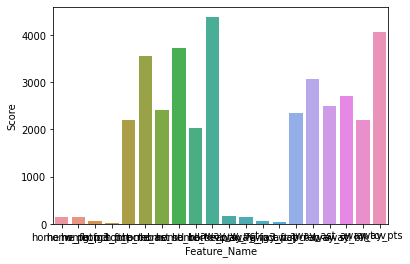

In [ ]:
"""
Feature Selection using SelectKBest and the Chi^2 Test
"""

# Drop unneeded columns
X = a.drop(["homeTeamPrice", "awayTeamPrice", "index", "team1_team_id", "home_team_id", "away_team_id"], axis=1)
# Select target column
y = a[['homeTeamPrice']]

# Create and fit selector
selector = SelectKBest(chi2, k=12)
fit = selector.fit(X, y)

# Extract column names for graph
df_columns = pd.DataFrame(X.columns)
df_scores = pd.DataFrame(fit.scores_)

# Create DF for graphing
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']
feature_scores
sns.barplot(data=feature_scores, x="Feature_Name", y="Score")

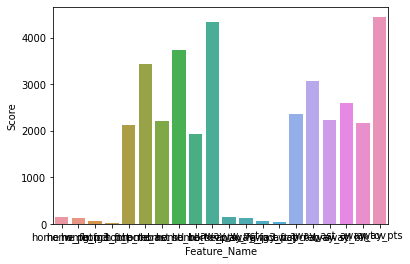

In [ ]:
"""
Feature Selection using SelectKBest and the Chi^2 Test
Same as above but with awayTeamPrice
"""

# Drop unneeded columns
X = a.drop(["homeTeamPrice", "awayTeamPrice", "index", "team1_team_id", "home_team_id", "away_team_id"], axis=1)
# Select target column
y = a[['awayTeamPrice']]

# Create and fit selector
selector = SelectKBest(chi2, k=12)
fit = selector.fit(X, y)

# Extract column names for graph
df_columns = pd.DataFrame(X.columns)
df_scores = pd.DataFrame(fit.scores_)

# Create DF for graphing
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']
feature_scores
sns.barplot(data=feature_scores, x="Feature_Name", y="Score")

In [ ]:
"""
Feature Selection with PCA
"""

pca = PCA(n_components=10)
fit = pca.fit(X)
print("Explained Variance: %s" % fit.explained_variance_ratio_)

Explained Variance: [0.38442502 0.26824216 0.09073936 0.07734477 0.03845889 0.03105208
 0.02769717 0.0255233  0.01670565 0.01426234]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


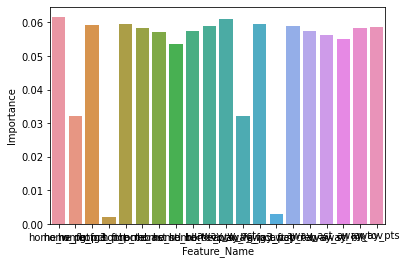

In [ ]:
"""
Using ExtraTrees to estimate importance of features
"""

model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, y)
df_importances = pd.DataFrame(model.feature_importances_)
importance_scores = pd.concat([df_columns, df_importances], axis=1)
importance_scores.columns = ['Feature_Name', 'Importance']
importance_scores
sns.barplot(data=importance_scores, x='Feature_Name', y='Importance')